## Day 35 Lecture 1 Assignment

In this assignment, we will learn about gradient boosting. We will use a dataset describing survival rates after breast cancer surgery loaded below and analyze the model generated for this dataset.

In [43]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, accuracy_score

In [30]:
# Attributes:
# Age of patient at time of operation (numerical)
# Patient's year of operation (year - 1900, numerical)
# Number of positive axillary nodes detected (numerical)
# Survival status (class attribute)
#  -- 1 = the patient survived 5 years or longer
#  -- 2 = the patient died within 5 year

cols = ['age', 'op_year', 'nodes', 'survival']
cancer = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/haberman.data', names=cols)

In [31]:
cancer.head()

,age,op_year,nodes,survival
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [33]:
cancer.shape

(306, 4)

Check for missing data and remove all rows containing missing data

In [4]:
# answer below:
cancer.isnull().mean()

age         0.0
op_year     0.0
nodes       0.0
survival    0.0
dtype: float64

*There are no rows with missing data*

Adjust the target variable so that it has values of either 0 or 1

In [34]:
cancer.survival = (cancer.survival == 2) + 0

In [35]:
cancer.head()

,age,op_year,nodes,survival
0,30,64,1,0
1,30,62,3,0
2,30,65,0,0
3,31,59,2,0
4,31,65,4,0


In [36]:
cancer.survival.value_counts()

0    225
1     81
Name: survival, dtype: int64

Split the data into train and test (20% in test)

In [37]:
X = cancer.drop('survival', axis=1)
y = cancer.survival

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Create a gradient boosted classification algorithm with a learning rate of 0.01 and max depth of 5. Report the accuracy.

In [38]:
gbc = GradientBoostingClassifier(learning_rate=0.01, max_depth=5)
gbc.fit(X_train, y_train)
y_pred = gbc.predict(X_test)
print(f'GBC Test Score: {accuracy_score(y_test, y_pred)}')

GBC Test Score: 0.7419354838709677


Print the confusion matrix for the test data. What do you notice about our predictions?

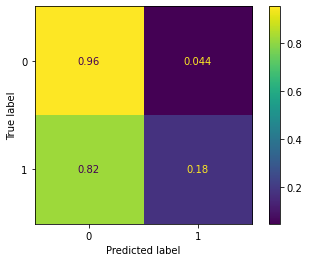

[[43  2]
 [14  3]]


In [41]:
plot_confusion_matrix(gbc, X_test, y_test, normalize='true')
plt.show()
print(confusion_matrix(y_test, y_pred))

*There are a lot of class 1's (patient died w/in 5 years) not being predicted correctly and as often. A tell of imbalanced classes.*

Print the confusion matrix for a learning rate of 1 and a learning rate of 0.5. What do you see now that stands out to you in the confusion matrix?

In [42]:
gbc = GradientBoostingClassifier(learning_rate=0.5, max_depth=1)
gbc.fit(X_train, y_train)
y_pred = gbc.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[44,  1],
       [13,  4]])

*Changing the max_depth to 1 and learning rate to 0.5 did not do anything significant.*

Perform a grid search for the optimal learning rate. Instead of accuracy, use a metric that will help your model predict the positive class.

In [44]:
params = {'learning_rate': [.001, .01, .1, .25, .5, .75]}
grid = GridSearchCV(GradientBoostingClassifier(), param_grid=params, cv=5, verbose=1, scoring='recall')
grid.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    1.9s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
         

List the feature importances for the model with the optimal learning rate.

In [50]:
n = pd.DataFrame({'features': X.columns, 
              'FI scores': grid.best_estimator_.feature_importances_})
n.sort_values(by='FI scores', ascending=False)
print(f'Optimal Learning Rate: {grid.best_estimator_.learning_rate}')
n.head()

Optimal Learning Rate: 0.75


,features,FI scores
0,age,0.400662
1,op_year,0.231028
2,nodes,0.368310
